# STUDENT'S MARKS PREDICTION

## OBJECTIVE

Education is very important issue regarding development of a country. The main objective of educational institutions is to provide high quality education to thier students. One way to accomplish this is by predicting student's academic performance and thereby taking early steps to improve student's performance and teaching quality. 


This project aims to predict student's marks using linear regression. The idea behind this analysis is to predict the marks of students by their studying hours. Through this project we can determine if a student will do study x() hours per day so how much marks he\she will get.

In [1]:
#import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
#load Dataset.
df=pd.read_csv(r"G:\Data Science inventico\Practice DataSet\student_info.csv")

### Understanding the Data

In [3]:
#checking shape of Dataset.
print(df.shape)

(200, 2)


In [4]:
#checking dataset in Dataframe format.
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [5]:
#check for null values
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [6]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [7]:
#filling null values with mean of each column.
df2= df.fillna(df.mean())

In [8]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

### Visualize the data to gain insights

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    200 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [10]:
df2.describe()

,study_hours,student_marks
count,200.000000,200.00000
mean,6.995949,77.93375
std,1.237218,4.92570
min,5.010000,68.57000
25%,5.790000,73.38500
50%,7.002974,77.71000
75%,8.072500,82.32000
max,8.990000,86.99000


The key take-aways are :

Max Score: 86.9 , Min Score: 68.57, Avg Score: 77.93
On an average, Students study around 7 hours

In [11]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [12]:
df2.corr()

,study_hours,student_marks
study_hours,1.000000,0.978696
student_marks,0.978696,1.000000


This function has given the correlation between study hours and student's marks. It is cleary visible that they are highly correlated because closer the value is to 1, which is 0.9786.

### Plotting the data.

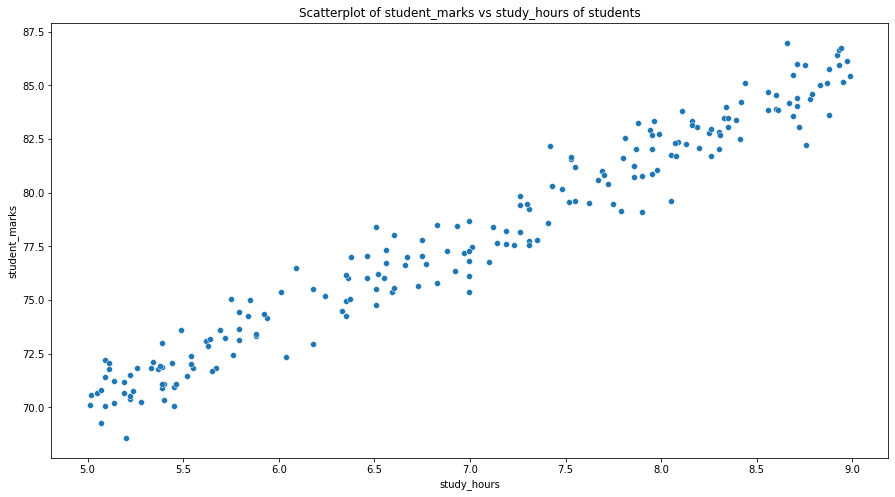

In [13]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df2['study_hours'], y=df2['student_marks'])
plt.title("Scatterplot of student_marks vs study_hours of students")
plt.show()

From the Scatter-Plot it is pretty clear that Linear Regression is the best Model for our data because our data is plotted linearly.

In [14]:
#Splitting Dataset

X= df2.drop("student_marks", axis='columns')
y= df2.drop("study_hours", axis= 'columns')

In [15]:
print("Shape of X= ", X.shape)
print("Shape of y= ", y.shape)

Shape of X=  (200, 1)
Shape of y=  (200, 1)


In [16]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 30, random_state= 51)
print("Shape of X_train=", X_train.shape)
print("Shape of _test=", X_test.shape)
print("Shape of y_train=", y_train.shape)
print("Shape of X_test=", y_test.shape)

Shape of X_train= (170, 1)
Shape of _test= (30, 1)
Shape of y_train= (170, 1)
Shape of X_test= (30, 1)


Plotting the data with regression line

### Select a model and train that model 

In [18]:
#importing libraries.
from sklearn.linear_model import LinearRegression

In [19]:
#y=m*X + c
lr=LinearRegression()

In [20]:
lr.fit(X_train, y_train)

LinearRegression()

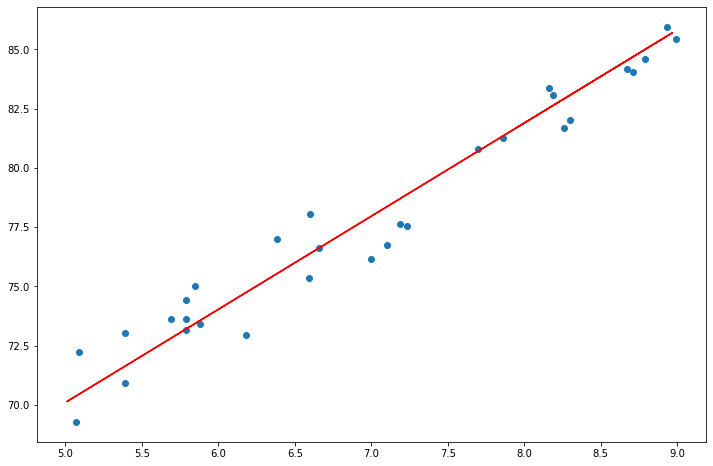

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color='r')

In [22]:
lr.coef_

array([[3.93277764]])

In [23]:
lr.intercept_

array([50.43316278])

#### Prediction

In [24]:
lr.predict([[4]]) [0][0]. round(2)

66.16

### Testing Model 

In [25]:
y_pred= lr.predict(X_test)

In [26]:
y_pred

array([[83.07521716],
       [78.86714509],
       [84.53034488],
       [85.78883372],
       [84.68765599],
       [80.71555057],
       [72.81066753],
       [71.63083424],
       [73.20394529],
       [71.63083424],
       [73.43991195],
       [76.3501674 ],
       [73.20394529],
       [73.55789528],
       [82.91790605],
       [70.37234539],
       [73.20394529],
       [78.70983398],
       [75.52428409],
       [82.64261162],
       [76.62546183],
       [70.45100094],
       [74.73772857],
       [77.94667344],
       [85.55286707],
       [82.52462829],
       [76.38949517],
       [85.0022782 ],
       [78.35588399],
       [81.344795  ]])

In [27]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns= ['Study_hours', 'Student_marks_original', 'Student_marks_predicted'])

,Study_hours,Student_marks_original,Student_marks_predicted
0,8.300000,82.02,83.075217
1,7.230000,77.55,78.867145
2,8.670000,84.19,84.530345
3,8.990000,85.46,85.788834
4,8.710000,84.03,84.687656
5,7.700000,80.81,80.715551
6,5.690000,73.61,72.810668
7,5.390000,70.90,71.630834
8,5.790000,73.14,73.203945
9,5.390000,73.02,71.630834


### Fine-Tuning model

In [28]:
print("Efficiency of our model is", lr.score(X_test, y_test)*100, "%")

Efficiency of our model is 94.91686876777118 %


### Presenting Solution

In [30]:
#saving the ML model.

import joblib
joblib.dump(lr, r"C:\Users\Aditya\Documents\Data Science Practice\ML Model\Student_marks_prediction_model.pkl")

['C:\\Users\\Aditya\\Documents\\Data Science Practice\\ML Model\\Student_marks_prediction_model.pkl']

In [31]:
# Loading Model

model= joblib.load(r"C:\Users\Aditya\Documents\Data Science Practice\ML Model\Student_marks_prediction_model.pkl")

In [32]:
model.predict([[7]])[0][0]

77.96260622907144

### Conclusion

We created a Simple Linear Regression Model to predict the scores of a student on a basis of the hours spent to study for the examination. Efficiency of our model is high, i.e., almost 95% which means that our model is working just fine.